   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000  

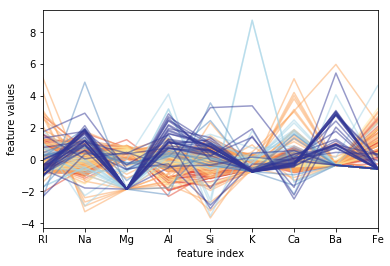

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(target_url,header=None,prefix="V")

glass.columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
print(glass.head())

summary = glass.describe()
print(summary)
ncol = len(glass.columns)

glass_normalized = glass.iloc[:,1:ncol]
ncol2 = len(glass_normalized.columns)
print(glass_normalized.head())
print(ncol2)

summary2 = glass_normalized.describe()
print(summary2)

for i in range(ncol2-1):
    mean = summary2.iloc[1,i]
    std = summary2.iloc[2,i]
    glass_normalized.iloc[:,i] = (glass_normalized.iloc[:,i]-mean)/std

nrows = len(glass_normalized.index)
print(nrows)
print(glass_normalized.head())

for i in range(nrows):
    datarow = glass_normalized.iloc[i,0:ncol2-1]
    labelColor = glass_normalized.iloc[i,ncol2-1]/7.0
    datarow.plot(color=plot.cm.RdYlBu(labelColor),alpha = 0.5)
plot.xlabel("feature index")
plot.ylabel("feature values")
plot.show()

    
    

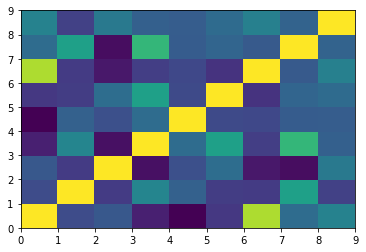

          RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  

In [12]:
# correlation heatmap

from pandas import DataFrame
Corrmat = DataFrame(glass.iloc[:,1:ncol2].corr())
plot.pcolor(Corrmat)
plot.show()
print(Corrmat)
